In [1]:
import pandas as pd

data = pd.read_csv('./heart.csv')
X=data[['sex','cp','fbs']]
y =data['target']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.33, random_state=42,
    stratify=True)

In [7]:
dtree_model = DecisionTreeClassifier(max_depth = 4).fit(X_train1, y_train1) 
dtree_predictions = dtree_model.predict(X_test1) 
print(classification_report(dtree_predictions,y_test1))

              precision    recall  f1-score   support

           0       0.62      0.85      0.72       124
           1       0.89      0.70      0.78       215

    accuracy                           0.76       339
   macro avg       0.76      0.78      0.75       339
weighted avg       0.79      0.76      0.76       339



[Text(0.41304347826086957, 0.9, 'cp <= 0.5\ngini = 0.499\nsamples = 686\nvalue = [328, 358]'),
 Text(0.17391304347826086, 0.7, 'sex <= 0.5\ngini = 0.381\nsamples = 332\nvalue = [247, 85]'),
 Text(0.08695652173913043, 0.5, 'fbs <= 0.5\ngini = 0.497\nsamples = 85\nvalue = [46, 39]'),
 Text(0.043478260869565216, 0.3, 'gini = 0.497\nsamples = 72\nvalue = [33, 39]'),
 Text(0.13043478260869565, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.2608695652173913, 0.5, 'fbs <= 0.5\ngini = 0.303\nsamples = 247\nvalue = [201, 46]'),
 Text(0.21739130434782608, 0.3, 'gini = 0.329\nsamples = 212\nvalue = [168, 44]'),
 Text(0.30434782608695654, 0.3, 'gini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(0.6521739130434783, 0.7, 'sex <= 0.5\ngini = 0.353\nsamples = 354\nvalue = [81, 273]'),
 Text(0.4782608695652174, 0.5, 'fbs <= 0.5\ngini = 0.125\nsamples = 119\nvalue = [8, 111]'),
 Text(0.391304347826087, 0.3, 'cp <= 2.5\ngini = 0.093\nsamples = 102\nvalue = [5, 97]'),
 Text(0.347826086956521

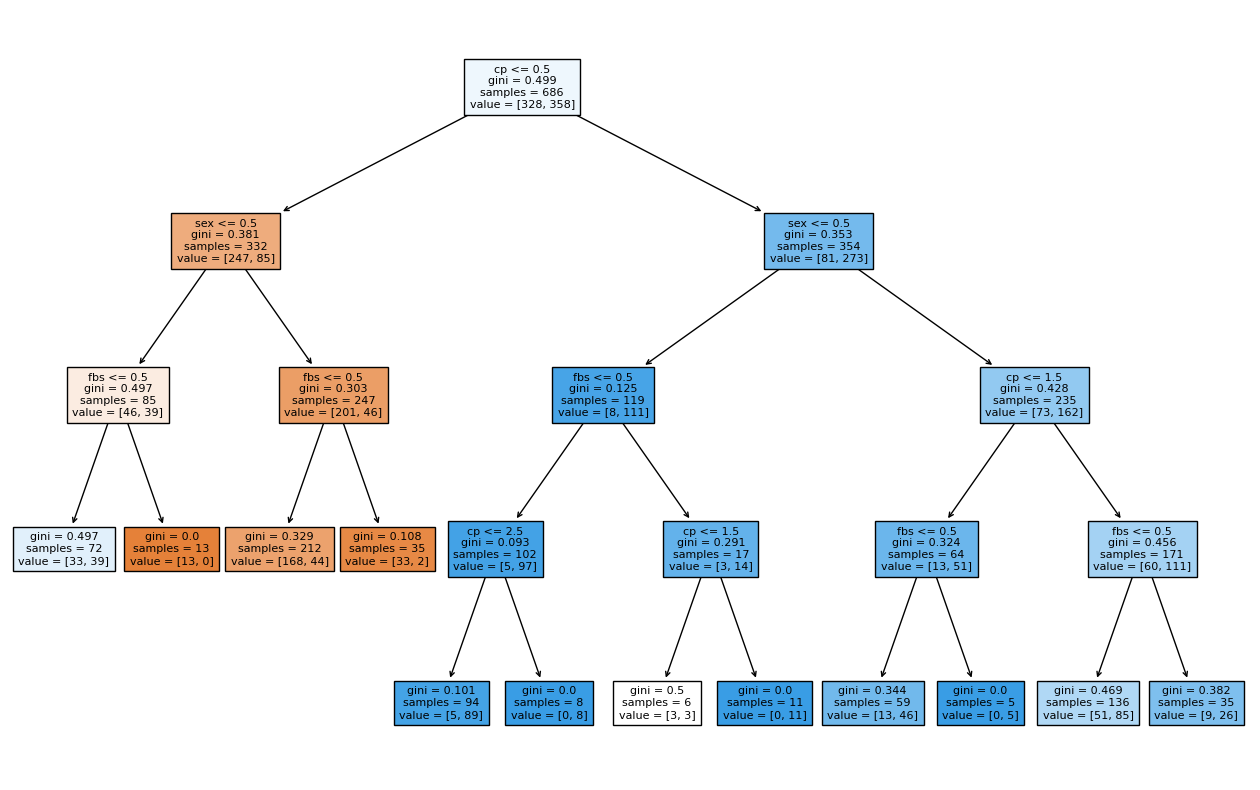

In [12]:
from matplotlib import pyplot as plt
from sklearn import tree

fig1 = plt.figure(figsize = (16,10))
tree.plot_tree(dtree_model,filled=True,feature_names= X.columns,fontsize=8)

In [14]:
data1 = pd.read_csv('./heart.csv')
X1=data1.drop('target',axis=1)
y1 = data1['target']

In [15]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(DecisionTreeClassifier(),{
    'max_depth':[2,3,4,5,6,7,8,10,23],
    'criterion':['gini','entropy'],
    'min_samples_leaf':[2,4,6,8,10]
    
},cv = 5)
clf.fit(X1,y1)
clf.cv_results_
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002720,0.000398,0.001819,0.000392,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.751220,0.746341,0.746341,0.765854,0.673171,0.736585,0.032504,86
1,0.002218,0.000412,0.001777,0.000409,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.751220,0.746341,0.746341,0.765854,0.673171,0.736585,0.032504,86
2,0.002416,0.000812,0.001384,0.000488,gini,2,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.751220,0.746341,0.746341,0.765854,0.673171,0.736585,0.032504,86
3,0.003328,0.000420,0.001592,0.000485,gini,2,8,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.751220,0.746341,0.746341,0.765854,0.673171,0.736585,0.032504,86
4,0.003608,0.000814,0.001600,0.000489,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.751220,0.746341,0.746341,0.765854,0.673171,0.736585,0.032504,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.003598,0.000503,0.001597,0.000485,entropy,23,2,"{'criterion': 'entropy', 'max_depth': 23, 'min...",0.980488,0.965854,0.956098,0.990244,0.980488,0.974634,0.012107,2
86,0.003414,0.000494,0.001394,0.000500,entropy,23,4,"{'criterion': 'entropy', 'max_depth': 23, 'min...",0.951220,0.907317,0.887805,0.936585,0.946341,0.925854,0.024371,14
87,0.002991,0.000015,0.001012,0.000015,entropy,23,6,"{'criterion': 'entropy', 'max_depth': 23, 'min...",0.926829,0.912195,0.897561,0.912195,0.941463,0.918049,0.014924,21
88,0.002993,0.000642,0.001521,0.000448,entropy,23,8,"{'criterion': 'entropy', 'max_depth': 23, 'min...",0.917073,0.907317,0.873171,0.917073,0.902439,0.903415,0.016149,28


In [16]:
clf.best_score_


0.9765853658536585

In [17]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}